# Data Analysis

## 1. Importing the Necessary Libraries

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
df = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\data\\raw data\\heart.csv")
# visualizing the data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# shape of the data
df.shape

(303, 14)

In [4]:

# general info including the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# column names
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
# number of categorical columns
len(df.select_dtypes("object").columns)

0

There is no categorical column in the dataset, all features in the dataset are numerical.

In [8]:
# statistical summary for the numerical columns
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now let's divide Numerical variables to
1. discrete numerical variables (unique values less than 20)
2. continous numerical variables.

In [11]:
# let's mask out discrete variables
disc_vars = [var for var in df.columns if df[var].nunique() < 20]
disc_vars

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [12]:
# number of discrete variables
len(disc_vars)

9

In [14]:
# let's visualize the discrete columns data
df[disc_vars].head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [15]:
# let's check if there are any missing values in the discrete variables data
df[disc_vars].isnull().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
slp        0
caa        0
thall      0
output     0
dtype: int64

There are no missing values in the discrete variables.

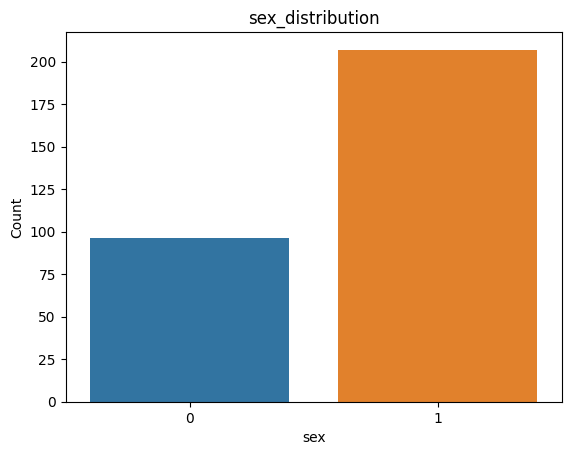

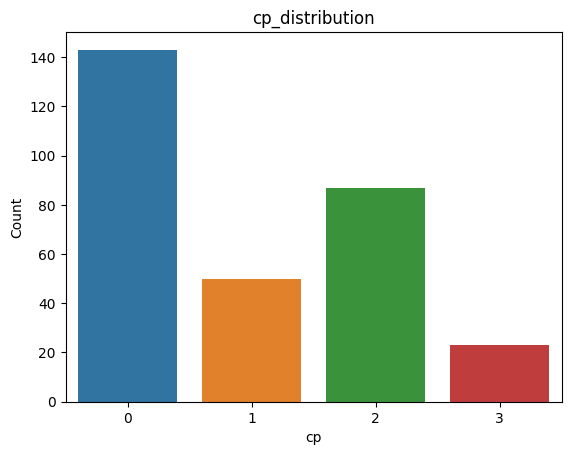

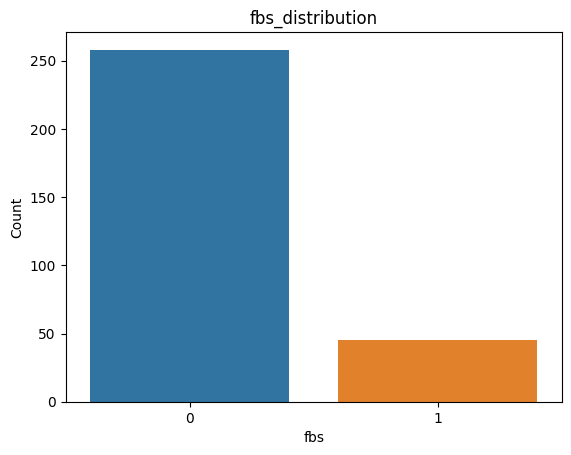

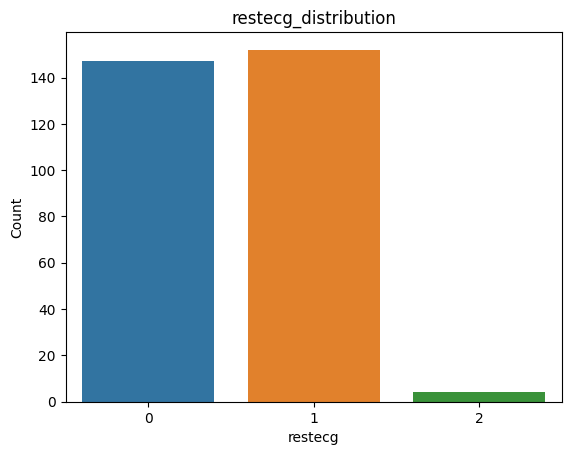

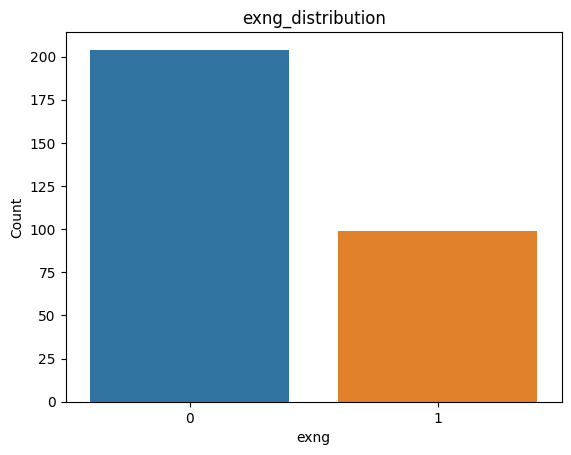

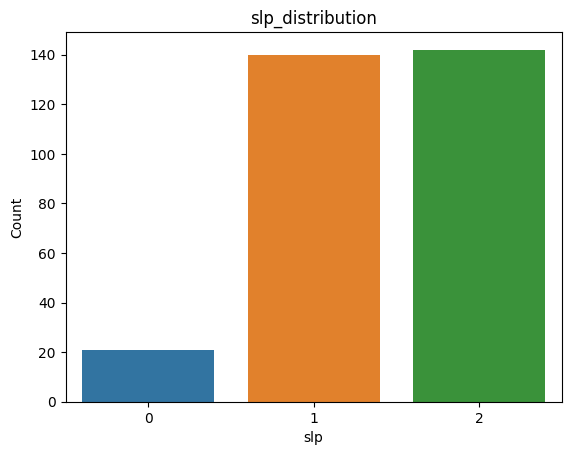

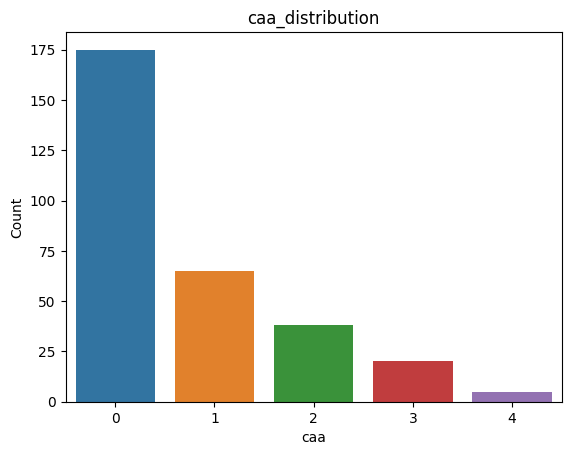

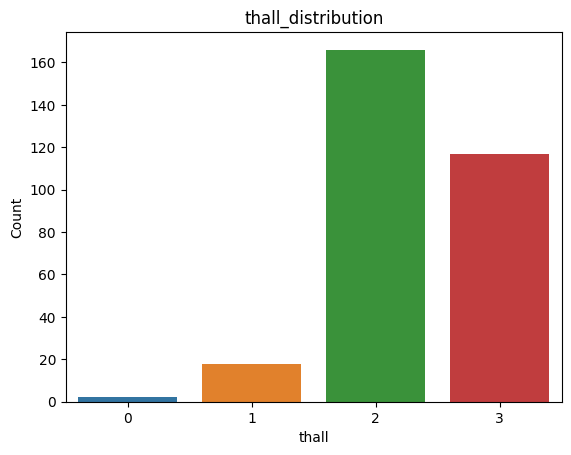

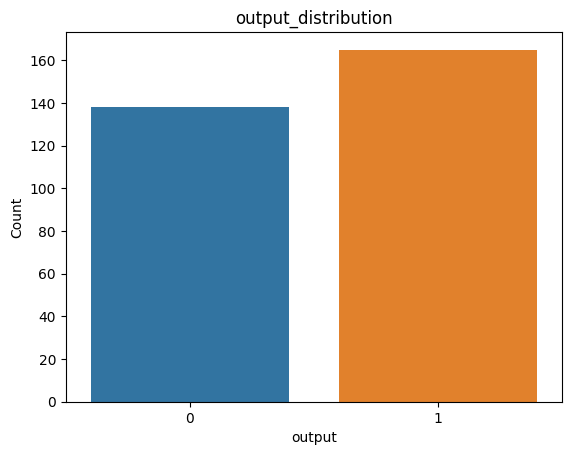

In [22]:
# now let's see the distribution of the discrete variables
for var in disc_vars:
    sns.countplot(data = df, x = df[var])
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title(var + "_distribution")
    plt.savefig(f"C:\\Users\\yozil\\Desktop\\My projects\\10. End_to_End_Heart_Attack_Risk_Prediction\\reports\\figure\\discrete_variables_plot\\{var} _distribution.jpg")
    plt.show()

From the above plot we can conclude that
1. the data have more male patients data.
- 0 Female
- 1 Male

2. the chest pain (cp) feature have more 0 and  moderate 2 values 
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

3. the fbs : fasting blood sugar: have more of 0 
- 0: (fasting blood sugar > 120 mg/dl) = True
- 1: (fasting blood sugar > 120 mg/dl) = False

4. rest_ecg : resting electrocardiographic results have more of 0 and 1 and too low 2
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.

5. exang stands for "exercise induced angina.": and the dataset have more of 0 features.
- 1: Yes (the patient experiences exercise-induced angina)
- 0: No (the patient does not experience exercise-induced angina)

6. slp: slope of peak exercise ST segment , have more 1 and 2 values and rare 0 value counts.
- 0 : Upsloping
- 1 : Flat
- 2 : Downsloping

7. caa: number of major vessels colored by fluoroscopy. this feature have more of 0 values and moderate 1 and 2 values respectively.
- 0: No major vessels colored
- 1: One major vessel colored
- 2: Two major vessels colored
- 3: Three major vessels colored
- 4: four major vessels colored

8.  thall : "thalassemia".
- 3: Normal
- 6: Fixed defect (indicating a permanent defect in the heart tissue, possibly due to past myocardial infarction)
- 7: Reversible defect (indicating that the defect in the heart tissue is temporary, possibly due to ischemia during the stress test)

9. output: Heart disease indicator, the dataset contains more patients with heart disease.
- 1: Presence of heart disease
- 0: Absence of heart disease 
